### Stroke Prediction Dataset
- In this dataset there are 11 features originally. A brief summary of the features are listed below:\
1) id: unique patient id\
2) gender: patient's gender "Male" or "Female"\
3) age: patient's age\
4) hypertension: gives information about whether the patient has hypertension or not. 0 means that the patient has no hypertension and 1 means the patient has hypertension\
5) heart_disease: patient's heart disease status. 0 means that the patient has no heart disease and 1 means that the patient has heart disease.  
6) ever_married: marriage history of the patient with "No" and "Yes"\
7) work_type: working type of the patient with possibilities of "Private", "Self-employed", "Govt_job", and "Never worked"\
8) Residence_type: accomodation environment of the patient as "Rural" or "Urban"\
9) avg_glucose_level: average glucose level in the blood of the patient as a float value\
10) bmi: body mass index of the patient as a float value (if known)\
11) smoking_status: tells us that if the patient has smoked, is smoking, never smoked, or status unkown before as "formerly smoked", "smokes", "never smoked", and "Unknown" respectively.\
12) stroke: tells us that if the patient had a stroke or not. 0 -> No, 1 -> Yes
- The dataset can be found at: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset    
#### Contributors:
- Emre Şahin Demirbaş
- Yunus Emre Dinçel


In [230]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

In [231]:
# Passing the strokedata csv file to a dataframe
# and filling the 'Unknown' values with NaN

df = pd.read_csv("strokedata.csv",na_values=['Unknown'])
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Convert float age to integer

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     3565 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [233]:
num_float_values = df['age'].apply(lambda x: isinstance(x, float)).sum()
num_float_values


5109

In [234]:
df['age'] = df['age'].astype(int)

In [235]:
num_float_values = df['age'].apply(lambda x: isinstance(x, float)).sum()
num_float_values

0

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   int32  
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     3565 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 459.1+ KB


In [237]:
df['age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  1, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        0, 41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10, 19,  6])

### Drop ID
- Some data in the dataset could be unnecessary when giving it to the learning algorithm, in our dataset it is the 'id' feature, so we are dropping it with drop() function of pandas

In [238]:
# Dropping the 'id' column
df = df.drop('id',axis=1)
# Checking the dataframe after drop()
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [239]:
# Displaying the number of people
# according to smoking_status
number_of_unknown= df['smoking_status'].value_counts()
number_of_unknown

smoking_status
never smoked       1892
formerly smoked     884
smokes              789
Name: count, dtype: int64

### One hot encoder for gender
- We would like to provide all the data in numbers as float, double or integer, so that the training algorithm could understand it, for this reason we are transforming the gender column which consists of 'Male' and 'Female' as two seperate columns 'is_male' and 'is_female'. Thanks to one-hot encoder we could represent males with 'is_male = 1' and 'is_female = 0', and females with 'is_male = 0' and 'is_female = 1'.

In [240]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Create 'ismale' and 'isfemale' columns based on 'gender'
df['is_male'] = df['gender'].apply(lambda x: 1 if x == 1 else 0)
df['is_female'] = df['gender'].apply(lambda x: 1 if x == 0 else 0)

# Drop the original 'gender' column if needed
df.drop('gender', axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0
1,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0
3,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1
4,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


### Inplace for ever_married
- Another way of replacing the non_numerical values is modifying them inplace with numerical values. In this section we are changing the marriage status 'ever_married' with 1 and 0 instead of 'Yes' and 'No' respectively.

In [241]:
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,1,0
1,61,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,80,0,1,1,Private,Rural,105.92,32.5,never smoked,1,1,0
3,49,0,0,1,Private,Urban,171.23,34.4,smokes,1,0,1
4,79,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


### Inplace for residence_type

In [242]:
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67,0,1,1,Private,1,228.69,36.6,formerly smoked,1,1,0
1,61,0,0,1,Self-employed,0,202.21,NaN,never smoked,1,0,1
2,80,0,1,1,Private,0,105.92,32.5,never smoked,1,1,0
3,49,0,0,1,Private,1,171.23,34.4,smokes,1,0,1
4,79,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,1


### Inplace Work Type

In [243]:
df['work_type'] = df['work_type'].replace({'Private': 5,'Self-employed': 4,'Govt_job': 3,'children': 2, 'Never_worked': 1})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67,0,1,1,5,1,228.69,36.6,formerly smoked,1,1,0
1,61,0,0,1,4,0,202.21,NaN,never smoked,1,0,1
2,80,0,1,1,5,0,105.92,32.5,never smoked,1,1,0
3,49,0,0,1,5,1,171.23,34.4,smokes,1,0,1
4,79,1,0,1,4,0,174.12,24.0,never smoked,1,0,1


### Inplace Smoking Status

In [244]:
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 3,'smokes': 2,'never smoked': 1})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67,0,1,1,5,1,228.69,36.6,3.0,1,1,0
1,61,0,0,1,4,0,202.21,NaN,1.0,1,0,1
2,80,0,1,1,5,0,105.92,32.5,1.0,1,1,0
3,49,0,0,1,5,1,171.23,34.4,2.0,1,0,1
4,79,1,0,1,4,0,174.12,24.0,1.0,1,0,1


In [245]:
df.shape
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67,0,1,1,5,1,228.69,36.6,3.0,1,1,0
1,61,0,0,1,4,0,202.21,NaN,1.0,1,0,1
2,80,0,1,1,5,0,105.92,32.5,1.0,1,1,0
3,49,0,0,1,5,1,171.23,34.4,2.0,1,0,1
4,79,1,0,1,4,0,174.12,24.0,1.0,1,0,1


In [246]:
# Displaying the total number of NaN values

numbernan = df.isna().sum()
numbernan

age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
is_male                 0
is_female               0
dtype: int64

CatPlot Before the cleaning BMI's outliers

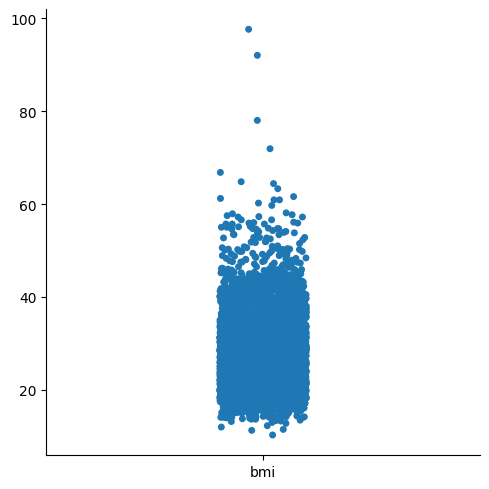

In [247]:
sns.catplot(df.iloc[:, 7:8])

### Cleaning Outlier Data from BMI 
- In datasets, there may be some values which are far located from the general distribution of the majority data called outliers. These could negatively impact our predictions. In our case, we would like to fill the missing bmi columns with the mean of the other NaN rows, but we do not want to see extreme values getting into account while calculating the mean of bmis, so we are selecting (after inspecting the distribution from graphs) the outliers and dropping the related rows, so that we could calculate a more accurate mean.

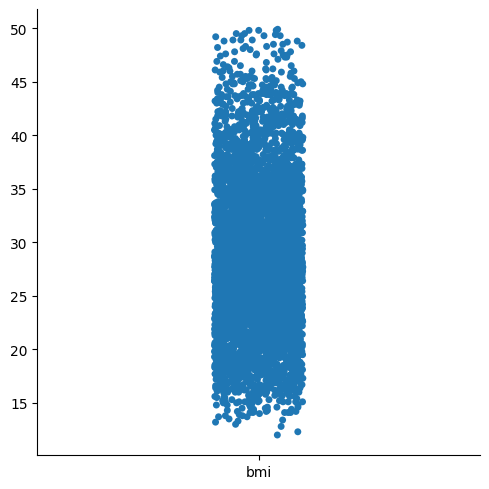

In [248]:
# From the catplots, we could see that bmi data is largely
# centered between 12 and 50, so we could name the values
# laying outside this range outliers and drop them
df = df[df['bmi'].between(12, 50) | df['bmi'].isna()]

sns.catplot(df.iloc[:, 7:8])

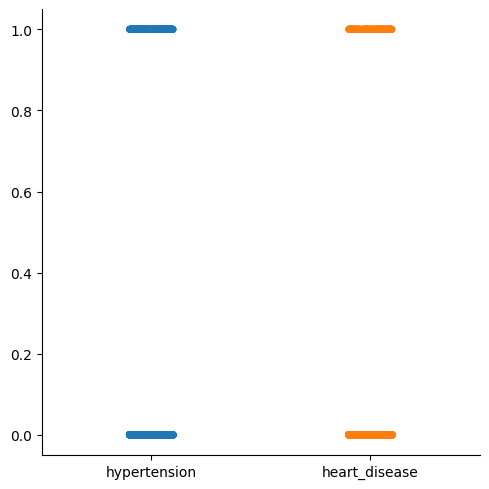

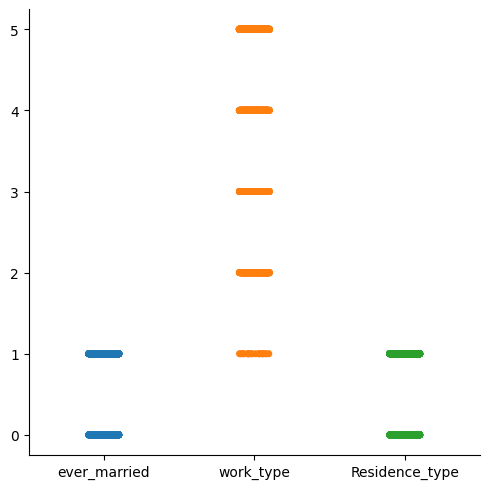

In [249]:
# These catplots checks if there are outliers at possible
# features i.e. hypertension, ever_married etc.
sns.catplot(df.iloc[:, 1:3])
sns.catplot(df.iloc[:, 3:6])

In [250]:
# Verifying that outlier values other than
# NaN values are dropped
numbernan = df.isna().sum()
numbernan    

age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1521
stroke                  0
is_male                 0
is_female               0
dtype: int64

### Apply Random Under Sampler Before Over Sampler
- When we inspected our dataset deeply, we observed that our dataset is imbalanced, in other words it has much more non_stroke patients than stroke patients, with a percentage of 95% vs. 5%. To solve this problem we have first eliminated some of the non_stroke patients to make it better than 95% vs. 5%.

In [251]:
# Importing Random Over Sampler from imblearn
from imblearn.under_sampling import RandomUnderSampler


# Using RUS with sampling_strategy = 0.06 meaning that
# we are dropping rows from the majority class and
# preserving the percentage of the minority class

RUS = RandomUnderSampler(sampling_strategy=0.06)
y = df['stroke']
x = df.drop(columns=['stroke'])


# fit predictor and target variable 
x_ros, y_ros = RUS.fit_resample(x, y)

y_ros_df = pd.DataFrame(y_ros, columns=['stroke'])
x_ros_df = pd.DataFrame(x_ros, columns=x.columns)


print(x)
frames = [x_ros_df,y_ros_df];
df = pd.concat(frames, axis=1)


      age  hypertension  heart_disease  ever_married  work_type  \
0      67             0              1             1          5   
1      61             0              0             1          4   
2      80             0              1             1          5   
3      49             0              0             1          5   
4      79             1              0             1          4   
...   ...           ...            ...           ...        ...   
5104   80             1              0             1          5   
5105   81             0              0             1          4   
5106   35             0              0             1          4   
5107   51             0              0             1          5   
5108   44             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  is_male  \
0                  1             228.69  36.6             3.0        1   
1                  0             202.21   NaN  

Copy the original data frame

In [252]:
# Creating a copy of the original dataframe
df_copy = df
df_copy

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,is_male,is_female,stroke
4207,49,0,0,1,3,1,68.68,28.8,1.0,0,1,0
1172,40,0,0,0,5,0,117.45,30.7,2.0,0,1,0
3973,52,1,0,1,5,0,100.71,37.0,1.0,1,0,0
793,29,0,0,0,5,1,101.28,22.7,1.0,0,1,0
4145,56,0,0,1,5,1,82.64,31.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,57,0,0,1,5,0,84.96,36.7,NaN,1,0,1
245,14,0,0,0,2,0,57.93,30.9,NaN,0,1,1
246,75,0,0,1,4,0,78.80,29.3,3.0,0,1,1
247,71,1,0,1,4,0,87.80,NaN,NaN,1,0,1


### Find the average score
- Another problem to deal with before giving the data to the training algorithm is to get rid of NaN values. For this purpose we could select to drop rows, which consists of NaN values, replacing the NaN values with 0s, or filling them with the average. We thought that a large margin of rows has NaN values for 'bmi' feature, so we did not want to drop them, and also tried to fill them with 0s but the score was still not the best. Out of these 3 options filling the values with mean gave to best result, so we filled them with the mean value of 'bmi'.

In [253]:
# Dropping the rows consisting of NaN values
without_NaN = df_copy.dropna()
# Calculating the average of bmis
# and displaying it
average_score = without_NaN['bmi'].mean()
average_score


29.834596994535524

In [254]:
# Displaying the rows with NaN values for bmi and showing the last
# version of them which are cleaned from NaN values via
# replacing them with the mean value
missing_score_rows = df[df['bmi'].isna()]
print("Rows with missing 'bmi':")
print(missing_score_rows)



Rows with missing 'bmi':
      age  hypertension  heart_disease  ever_married  work_type  \
1779   32             0              0             0          5   
2494   78             0              1             1          4   
2322   52             1              0             1          4   
2030    0             0              0             0          2   
5047   40             0              0             1          5   
...   ...           ...            ...           ...        ...   
198    79             0              0             1          5   
200    74             0              0             1          5   
218    76             1              1             1          4   
227    74             0              0             1          4   
247    71             1              0             1          4   

      Residence_type  avg_glucose_level  bmi  smoking_status  is_male  \
1779               0              95.58  NaN             2.0        1   
2494               1    

In [255]:
# Filling the NaN values with mean
# and displaying a brief summary
# of the data after the operations so far 
df['bmi'].fillna(average_score,inplace= True)
print(f"\n\nAverage Score is: {average_score} ")
print("\nDataFrame after filling missing 'bmi' values:")
print(df) 



Average Score is: 29.834596994535524 

DataFrame after filling missing 'bmi' values:
      age  hypertension  heart_disease  ever_married  work_type  \
4207   49             0              0             1          3   
1172   40             0              0             0          5   
3973   52             1              0             1          5   
793    29             0              0             0          5   
4145   56             0              0             1          5   
...   ...           ...            ...           ...        ...   
244    57             0              0             1          5   
245    14             0              0             0          2   
246    75             0              0             1          4   
247    71             1              0             1          4   
248    78             0              0             1          5   

      Residence_type  avg_glucose_level        bmi  smoking_status  is_male  \
4207               1         

In [256]:
df_copy

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,is_male,is_female,stroke
4207,49,0,0,1,3,1,68.68,28.800000,1.0,0,1,0
1172,40,0,0,0,5,0,117.45,30.700000,2.0,0,1,0
3973,52,1,0,1,5,0,100.71,37.000000,1.0,1,0,0
793,29,0,0,0,5,1,101.28,22.700000,1.0,0,1,0
4145,56,0,0,1,5,1,82.64,31.000000,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,57,0,0,1,5,0,84.96,36.700000,NaN,1,0,1
245,14,0,0,0,2,0,57.93,30.900000,NaN,0,1,1
246,75,0,0,1,4,0,78.80,29.300000,3.0,0,1,1
247,71,1,0,1,4,0,87.80,29.834597,NaN,1,0,1


Forward Manner for smoking status ( We use forward manner beacause of the last smoking status is NaN, and ML not accept the nan)
- Apart from the methods of dealing with NaN values we have discussed above, forward filling (ffill) and backward filling (bfill) methods are also available for us. When dealing with NaN values of smoking_status we have chosen to apply ffill which fills the NaN values with the values just before them. Although it is normally possible to fill the NaN values with the values just after them, in our dataset it was not possible for us to use it, because the last row of our dataset contains a NaN value itself.

In [257]:
# Using forward filling method of pandas ffill()
# to fill the NaN values of smoking_status
df_copy.ffill(axis=0,inplace=True)
df_copy

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,is_male,is_female,stroke
4207,49,0,0,1,3,1,68.68,28.800000,1.0,0,1,0
1172,40,0,0,0,5,0,117.45,30.700000,2.0,0,1,0
3973,52,1,0,1,5,0,100.71,37.000000,1.0,1,0,0
793,29,0,0,0,5,1,101.28,22.700000,1.0,0,1,0
4145,56,0,0,1,5,1,82.64,31.000000,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,57,0,0,1,5,0,84.96,36.700000,3.0,1,0,1
245,14,0,0,0,2,0,57.93,30.900000,3.0,0,1,1
246,75,0,0,1,4,0,78.80,29.300000,3.0,0,1,1
247,71,1,0,1,4,0,87.80,29.834597,3.0,1,0,1


### Solving Imbalanced Problem

stroke
0    4133
1     248
Name: count, dtype: int64

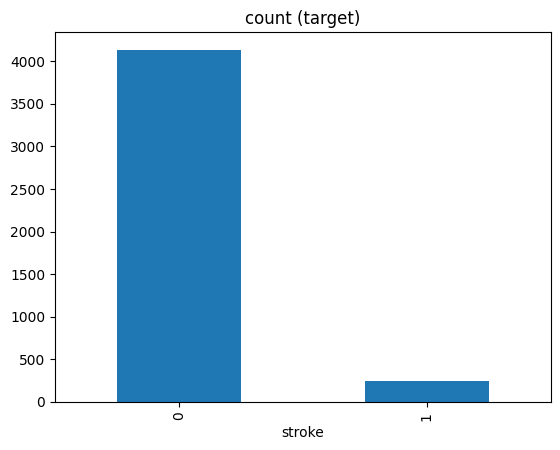

In [258]:
# Showing the number of patients with and without stroke
# before solving the imbalance problem in numbers and a plot
df_copy['stroke'].value_counts().plot(kind='bar', title='count (target)')
df_copy['stroke'].value_counts()

### HeatMap before the Balancing Data

<Axes: >

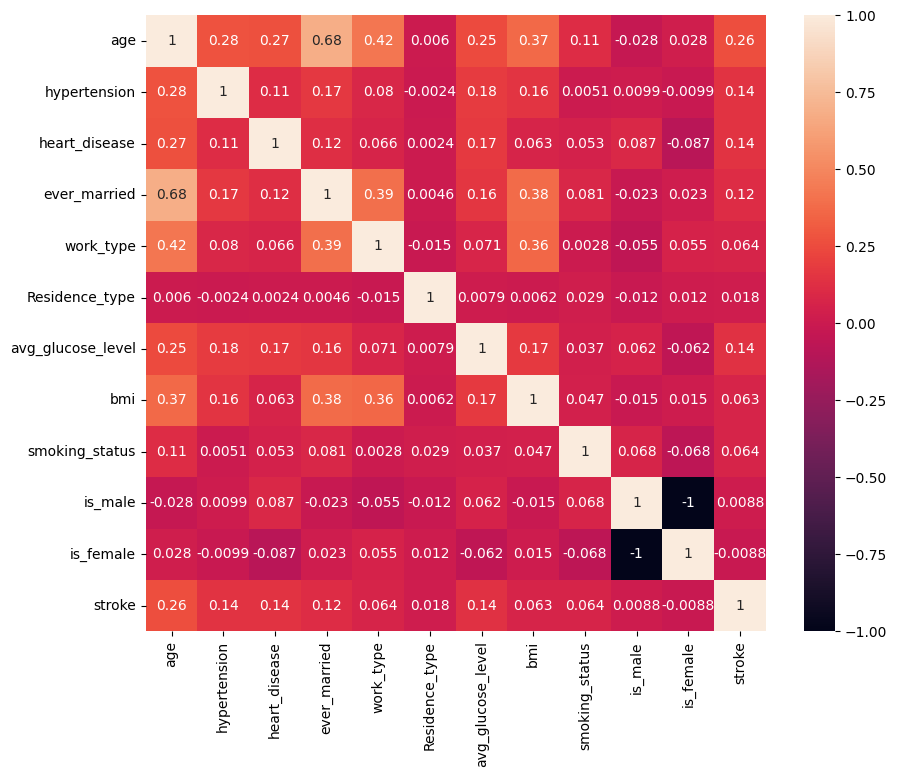

In [259]:
# Displaying a heatmap of the unbalanced dataframe
# with its features' correlations annotated
corrl = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrl,annot=True)

### Random Over Sampler (ROS)
- In this section, we are using the ROS after undersampling the majority class with RUS to further balance our dataset. 

original dataset shape: Counter({0: 4133, 1: 1033})
Resample dataset shape Counter({0: 4133, 1: 1033})
original dataset shape: Counter({0: 4133, 1: 2066})
Resample dataset shape Counter({0: 4133, 1: 4133})


<Axes: title={'center': 'count (target)'}, xlabel='stroke'>

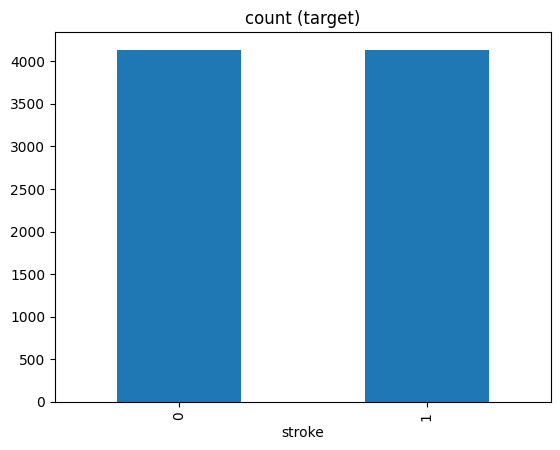

In [260]:
# Importing the necessary libraries to apply oversampling method
# to fix the imbalance problem
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
 

# Here we have used ROS more than one time to enhance the randomness of the added
# minority classes data (in the hope of reducing the possibility overfitting) 
ros = RandomOverSampler(random_state=42, sampling_strategy=0.25)
y = df_copy['stroke']
x = df_copy.drop(columns=['stroke'])


# fit predictor and target variable 
x_ros, y_ros = ros.fit_resample(x, y)

y_ros_df = pd.DataFrame(y_ros, columns=['stroke'])
x_ros_df = pd.DataFrame(x_ros, columns=x.columns)


frames = [x_ros_df,y_ros_df];
df_copy = pd.concat(frames, axis=1)

ros = RandomOverSampler(random_state=42, sampling_strategy=0.50)
y = df_copy['stroke']
x = df_copy.drop(columns=['stroke'])

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))
# fit predictor and target variable 
x_ros, y_ros = ros.fit_resample(x, y)

y_ros_df = pd.DataFrame(y_ros, columns=['stroke'])
x_ros_df = pd.DataFrame(x_ros, columns=x.columns)


frames = [x_ros_df,y_ros_df];
df_copy = pd.concat(frames, axis=1)


ros = RandomOverSampler(random_state=42)
y = df_copy['stroke']
x = df_copy.drop(columns=['stroke'])


# fit predictor and target variable 
x_ros, y_ros = ros.fit_resample(x, y)

y_ros_df = pd.DataFrame(y_ros, columns=['stroke'])
x_ros_df = pd.DataFrame(x_ros, columns=x.columns)


frames = [x_ros_df,y_ros_df];
df_copy = pd.concat(frames, axis=1)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

# Redisplaying the number of patients after balancing
df_copy['stroke'].value_counts().plot(kind='bar', title='count (target)')

In [261]:
df_copy.describe()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,is_male,is_female,stroke
count,8266.000000,8266.000000,8266.000000,8266.000000,8266.000000,8266.000000,8266.000000,8266.000000,8266.000000,8266.000000,8266.000000,8266.00000
mean,55.168643,0.187152,0.126542,0.762884,4.269901,0.543431,120.268346,29.435287,1.883015,0.422090,0.577910,0.50000
std,22.445015,0.390057,0.332480,0.425340,0.982906,0.498140,55.453783,6.377422,0.879413,0.493923,0.493923,0.50003
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,12.000000,1.000000,0.000000,0.000000,0.00000
25%,42.000000,0.000000,0.000000,1.000000,4.000000,0.000000,79.172500,25.400000,1.000000,0.000000,0.000000,0.00000
50%,59.000000,0.000000,0.000000,1.000000,5.000000,1.000000,97.730000,29.700000,2.000000,0.000000,1.000000,0.50000
75%,74.000000,0.000000,0.000000,1.000000,5.000000,1.000000,160.480000,32.600000,3.000000,1.000000,1.000000,1.00000
max,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,49.900000,3.000000,1.000000,1.000000,1.00000


<Axes: ylabel='count'>

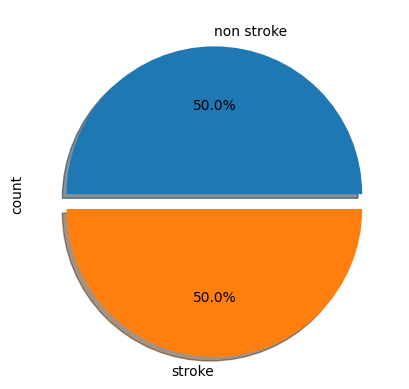

In [262]:
# A pie-plot of the dataset showing the non_stroke and stroke patients'
# percentages after balancing operations
df_copy['stroke'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non stroke","stroke"], shadow=True)


# Visulization 

### Scatter Plot

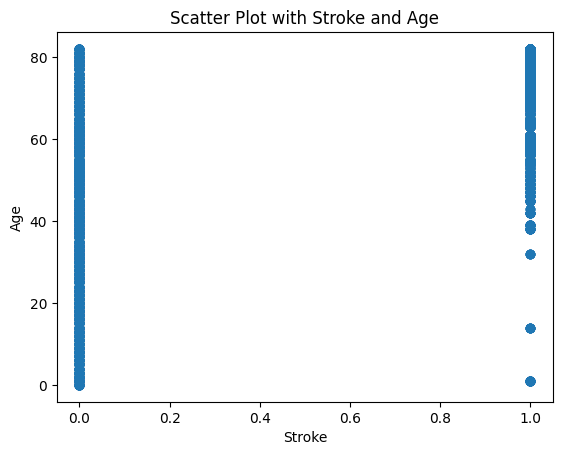

In [263]:

area = (30 * np.random.rand(100))**2
plt.scatter(df_copy['stroke'], df_copy['age'])
plt.title('Scatter Plot with Stroke and Age')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

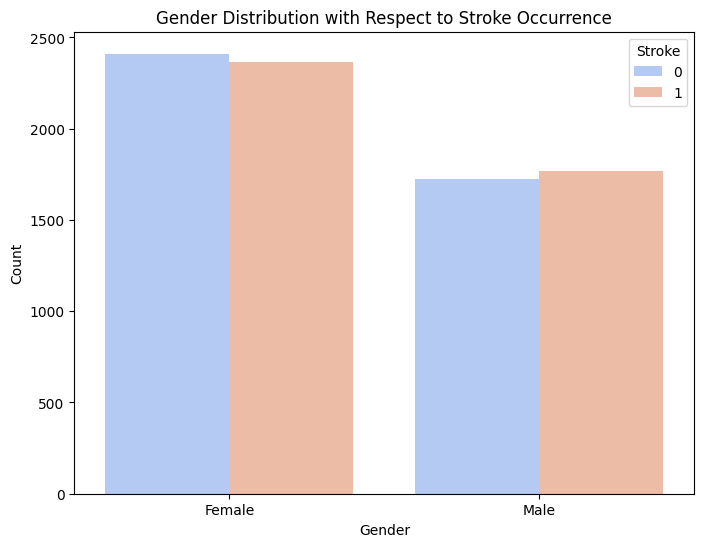

In [264]:
# In this section we are trying to show the relationship between
# gender distribution and stroke occurence with a bar-plot
# it can also be seen as a comparision of possibility percentages
# of stroke occurence between males and females, in the plot
# ice blue represents non stroke and light pink represents stroke patients
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'is_male' and 'is_female' columns exist in your DataFrame
gender_stroke = df_copy.groupby(['is_male', 'is_female', 'stroke']).size().reset_index(name='count')

# Merging gender columns into a single 'Gender' column
gender_stroke['Gender'] = gender_stroke.apply(lambda x: 'Male' if x['is_male'] == 1 else 'Female', axis=1)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='count', hue='stroke', data=gender_stroke, palette='coolwarm')
plt.title('Gender Distribution with Respect to Stroke Occurrence')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()


## Pair Plot to analyze the Numerical Features by Stroke
- In this section we are trying to show the relationship between the stroke and age, average glucose level, and bmi. (in other words numerical columns) We are showing the relationship with a pairplot. By using the pairplot, we could observe many things. For example, other than some exceptions (outliers) the elder patients with high average glucose levels are more inclined to be stroke. In the plot blue represents non stroke and green represents stroke patients.

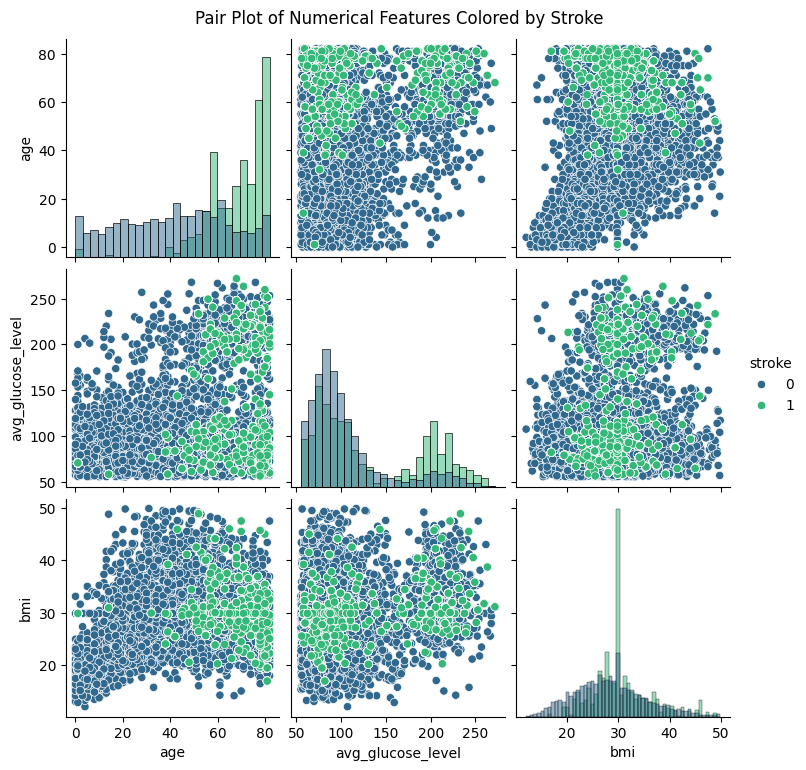

In [265]:
import seaborn as sns

# Selecting numerical columns for pair plot
numerical_cols = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Filtering the DataFrame to include only numerical columns
df_numerical = df_copy[numerical_cols]

# Creating pair plot colored by 'stroke'
sns.pairplot(df_numerical, hue='stroke', palette='viridis', diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Features Colored by Stroke', y=1.02)
plt.show()


## Scatter Plot for Correlation

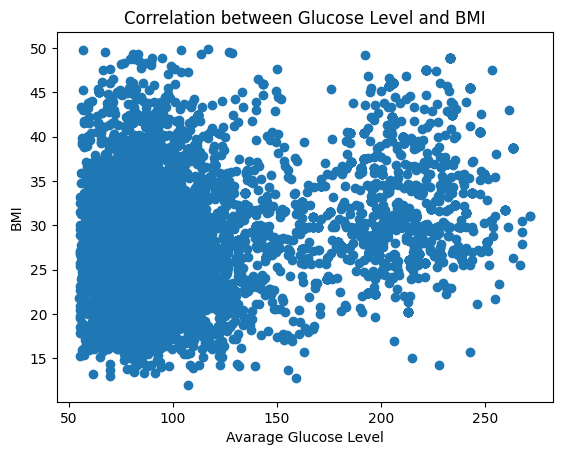

In [266]:
# In this snippet we are trying to show the correlation between
# the average glucose level and bmi, by giving them as arguments
# in the scatter plot function, it can be seen that these two
# features are highly related to each other, meaning that
# patients with high bmis also have high glucose levels in general
area = (30 * np.random.rand(100))**2
plt.scatter(df_copy['avg_glucose_level'], df_copy['bmi'])
plt.xlabel('Avarage Glucose Level')
plt.ylabel('BMI')
plt.title('Correlation between Glucose Level and BMI')
plt.show()

## Bar Plot for Stroke Impact Across Age Ranges

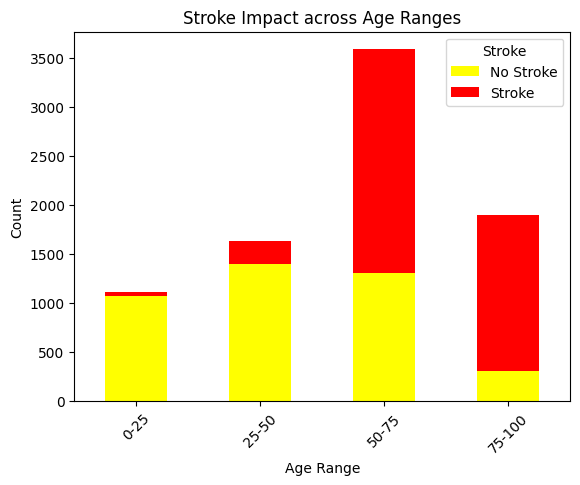

In [267]:
# In here we are trying to show the relationship between the stroke and age
# with a barplot, by looking at the plot, we could see that high aged
# patients are more inclined to stroke
# Assuming df_copy contains your dataset
ranges_value= [0, 25, 50, 75, 100]  # Define your age bins
labels = ['0-25', '25-50', '50-75', '75-100']  # Labels for the bins

# Crosstabulation between age ranges and stroke with dynamic binning
show_age_impact = pd.crosstab(pd.cut(df_copy['age'], bins= ranges_value, labels=labels), df_copy['stroke'])

# Plotting the crosstab data
show_age_impact.plot(kind='bar', stacked=True, color=['yellow', 'red'], grid=False)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Stroke Impact across Age Ranges')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)  
plt.show()

## Bar Plot for Ever Married & Age

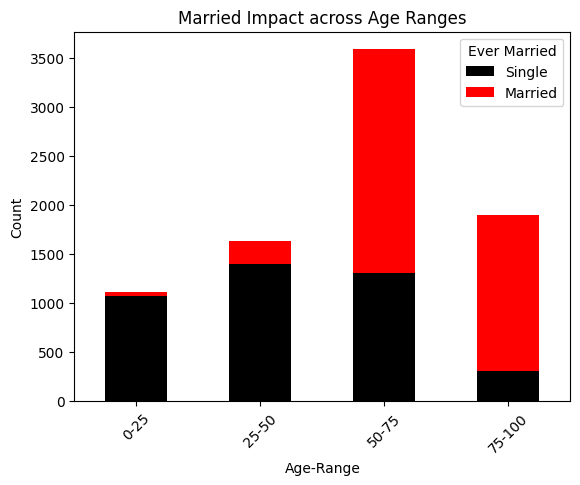

In [268]:
# This snippet is to show the relationship between marriage status
# and age-ranges, from the graph we could calculate that older people
# are more likely to have been married before
ranges_value= [0, 25, 50, 75, 100]  
labels = ['0-25', '25-50', '50-75', '75-100'] 
show_age_impact_married = pd.crosstab(pd.cut(df_copy['age'], bins= ranges_value, labels=labels), df_copy['ever_married'])

# Plotting the crosstab data
show_age_impact.plot(kind='bar', stacked=True, color=['black', 'red'], grid=False)
plt.xlabel('Age-Range')
plt.ylabel('Count')
plt.title('Married Impact across Age Ranges')
plt.legend(title='Ever Married', labels=['Single', 'Married'])
plt.xticks(rotation=45)  
plt.show()

## HeatMap for DataFrame
- This section could arguably be one of the most important of all, because in here we are providing a heatmap for our dataset. With the help of it, we could observe all the correlations between all variables in one place. Lighter the color means higher the correlation between two features. To make the heatmap more readable, we enlarged it by providing non-default figsize arguments

<Axes: >

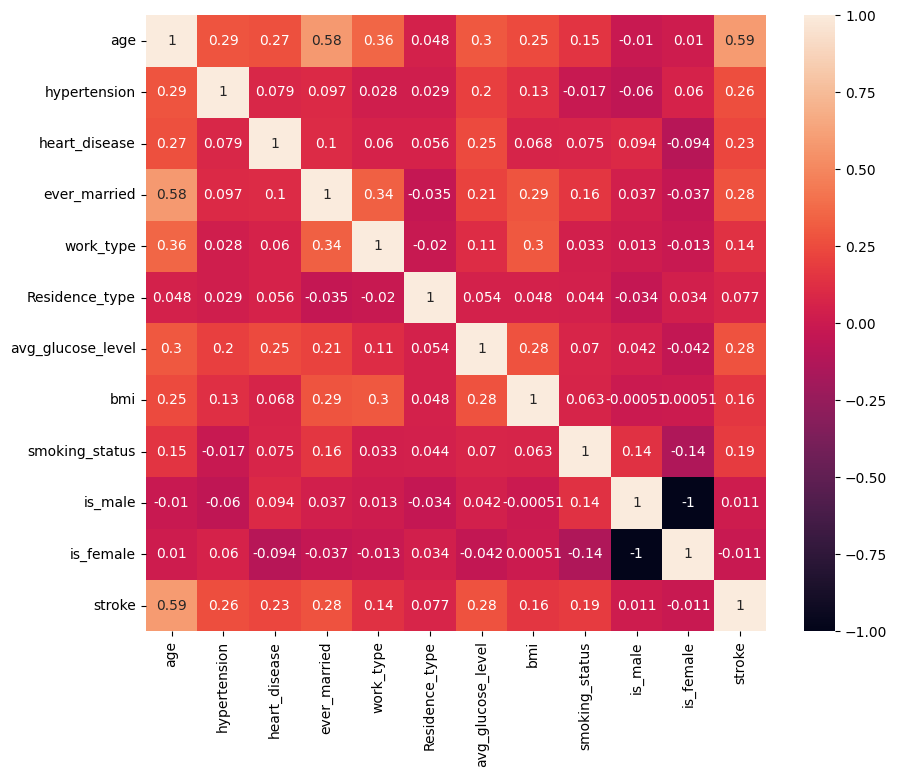

In [269]:
corrl = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrl,annot=True)

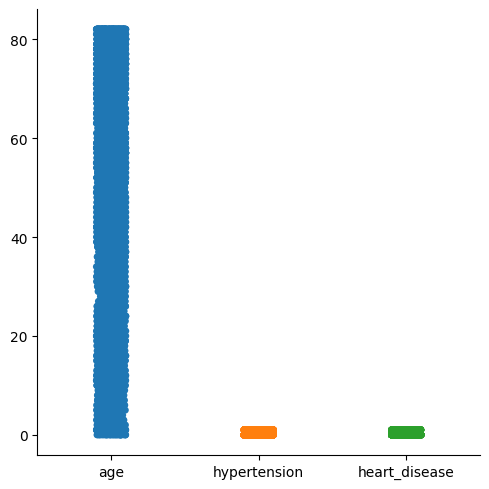

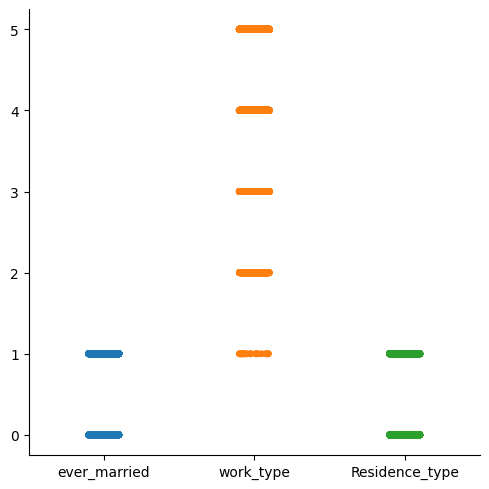

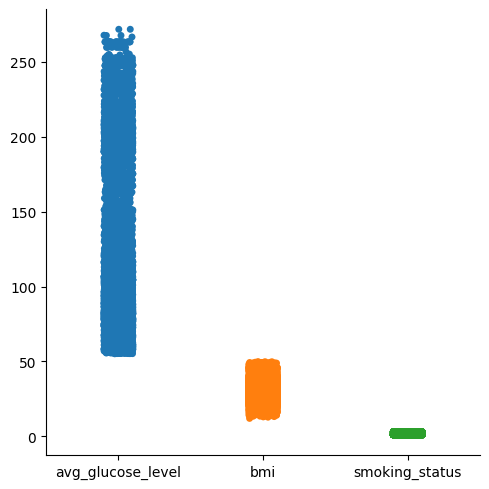

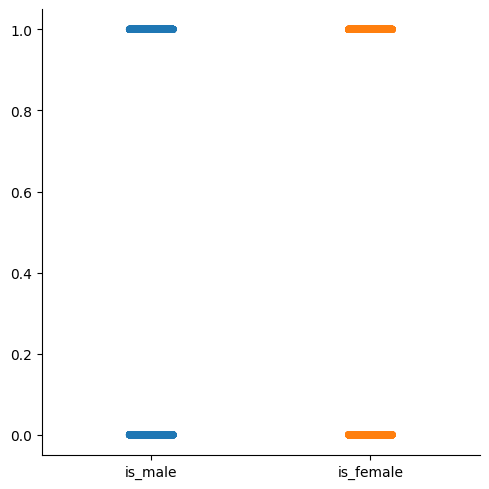

In [270]:
# Catplot of our dataframes' features
sns.catplot(df_copy.iloc[:, 0:3])
sns.catplot(df_copy.iloc[:, 3:6])
sns.catplot(df_copy.iloc[:, 6:9])
sns.catplot(df_copy.iloc[:, 9:11])

In [271]:
# Checking that our dataset no longer has any NaN values
numbernan = df.isna().sum()
numbernan    

age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
is_male              0
is_female            0
stroke               0
dtype: int64

# Feature Selection
- In this part, we are now putting our dataset's last form into the various machine learning algorithms, from SelectKBest -> Lasso. To use them, we are importing the algorithms from scikit-learn library. After trying a handful of algorithms, we observed that for our dataset, Ridge model with 11 features gave the best result. All of the results' of the respective models are shown in the end of each models' section.

In [272]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

X = df_copy.drop(columns=['stroke'])
y = df_copy['stroke']

# Although there are many other splitting techniques (like 75% training and 25% test)
# we used 80% training and 20% test for our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Initialize variables to keep track of the best feature selection method and its score
best_method = ""
best_score = 0

## K-best for bmi with mean

In [273]:

#Feature selection using SelectKBest (chi2)

select_k_best = SelectKBest(score_func=chi2, k=4)
X_new = select_k_best.fit_transform(X_train, y_train)
x_test_new = select_k_best.transform(X_test)
clf = RandomForestClassifier()
clf.fit(X_new, y_train)
y_pred = clf.predict(x_test_new)
score = clf.score(select_k_best.transform(X_test), y_test)

accuracy =accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print("SelectKBest (chi2) Score:", score)
if score > best_score:
    best_score = score
    best_method = "SelectKBest (chi2)"

print("SelectKBest (chi2) accuracy:", accuracy)
print("SelectKBest (chi2) recall:",recall)
print("SelectKBest (chi2) precision:",precision)
print("SelectKBest (chi2) roc_auc:",roc_auc)


confusion = confusion_matrix(y_test,y_pred)
print(confusion)



SelectKBest (chi2) Score: 0.9685610640870617
SelectKBest (chi2) accuracy: 0.9685610640870617
SelectKBest (chi2) recall: 0.9976218787158145
SelectKBest (chi2) precision: 0.9437570303712036
SelectKBest (chi2) roc_auc: 0.9680606318548322
[[763  50]
 [  2 839]]


### With Cross-Validation Version

In [274]:
    
# X = select_k_best.fit_transform(X,y)
# X_new = select_k_best.transform(X_train)
# x_test_new = select_k_best.transform(X_test)
# k_folds = 10

# # Create a KFold object
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y.to_numpy()[train_index], y.to_numpy()[test_index]

#     clf = RandomForestClassifier()
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     score = clf.score(X_test, y_test)

#     accuracy =accuracy_score(y_test,y_pred)
#     recall = recall_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)

#     print("SelectKBest (chi2) Score:", score)
#     if score > best_score:
#         best_score = score
#         best_method = "SelectKBest (chi2)"

#     print("SelectKBest (chi2) accuracy:", accuracy)
#     print("SelectKBest (chi2) recall:",recall)
#     print("SelectKBest (chi2) precision:",precision)
#     confusion = confusion_matrix(y_test,y_pred)
#     print(confusion)

## RFE

In [275]:
# Recursive Feature Elimination with 4 features
num_features_to_select = min(4, len(X_train.columns))  
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=num_features_to_select)

X_new = rfe.fit_transform(X_train, y_train)


clf.fit(X_new, y_train)

x_transform = rfe.transform(X_test)
score = clf.score(x_transform, y_test)
y_pred = clf.predict(x_transform)

accuracy =accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print("RFE Score:", score)

print("accuracy score",accuracy)
print("RFE recall:",recall)
print("RFE precision:",precision)
print("RFE roc_auc:",roc_auc)

if score > best_score:
    best_score = score
    best_method = "RFE"

RFE Score: 0.9746070133010882
accuracy score 0.9746070133010882
RFE recall: 0.9976218787158145
RFE precision: 0.9544937428896473
RFE roc_auc: 0.9742106933554472


# Logistic Regression

In [276]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression(random_state=42, max_iter=10000)
Logistic_model.fit(X_train, y_train)
y_pred = Logistic_model.predict(X_test)

accuracy =accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)


score = Logistic_model.score(X_test, y_test)
print("Logistic Regression Score: ", score)

print("Logistic Regression Accuracy score",accuracy)
print("Logistic Regression recall:",recall)
print("Logistic Regression precision:",precision)
print("Logistic Regression roc_auc:",roc_auc)
if score > best_score:
    best_score = score
    best_method = "Logistic Regression"


confusion = confusion_matrix(y_test,y_pred)
print(confusion)

Logistic Regression Score:  0.7932285368802902
Logistic Regression Accuracy score 0.7932285368802902
Logistic Regression recall: 0.8252080856123662
Logistic Regression precision: 0.7806524184476941
Logistic Regression roc_auc: 0.7926778435441906
[[618 195]
 [147 694]]


## Ridge

In [277]:

# Feature selection using Ridge for feature importance

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Estimate feature importance based on the magnitude of the coefficients

feature_importance = np.abs(ridge.coef_)



num_features_to_select = 11
selected_feature_indices = np.argsort(feature_importance)[::-1][:num_features_to_select]


selected_features = X_train.iloc[:, selected_feature_indices]

clf.fit(selected_features, y_train)

score = clf.score(X_test.iloc[:, selected_feature_indices], y_test)

y_pred = clf.predict(X_test.iloc[:, selected_feature_indices])

accuracy =accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print("Ridge (Feature Importance) Score:", score)
print("Ridge Accuracy score",accuracy)
print("Ridge recall:",recall)
print("Ridge precision:",precision)
print("Ridge roc_auc:",roc_auc)

if score > best_score:
    best_score = score
    best_method = "Ridge (Feature Importance)"

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

Ridge (Feature Importance) Score: 0.9854897218863361
Ridge Accuracy score 0.9854897218863361
Ridge recall: 0.9976218787158145
Ridge precision: 0.9744483159117305
Ridge roc_auc: 0.9852808040565543
[[791  22]
 [  2 839]]


## MIC (Mutual Informatıon Classification)

In [278]:
# Feature selection using MIC (mutual_info_classif)

mic = SelectKBest(score_func=mutual_info_classif, k=4)
X_new = mic.fit_transform(X_train, y_train)

clf.fit(X_new, y_train)
score = clf.score(mic.transform(X_test), y_test)

y_pred = clf.predict(mic.transform(X_test))

print("MIC (mutual_info_classif) Score:", score)

accuracy =accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print("MIC Accuracy score",accuracy)
print("MIC recall:",recall)
print("MIC precision:",precision)
print("MIC roc_auc:",roc_auc)
if score > best_score:
    best_score = score
    best_method = "MIC (mutual_info_classif)"

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

MIC (mutual_info_classif) Score: 0.9794437726723095
MIC Accuracy score 0.9794437726723095
MIC recall: 0.9976218787158145
MIC precision: 0.9632606199770379
MIC roc_auc: 0.9791307425559391
[[781  32]
 [  2 839]]


## PCA

In [279]:
# Principal Component Analysis (PCA) with n_components = 4
pca_model = PCA(n_components=4)
X_new_train = pca_model.fit_transform(X_train)
x_transform= pca_model.transform(X_test)


RandomForest_model = RandomForestClassifier(random_state=42)
RandomForest_model.fit(X_new_train, y_train)

y_pred = RandomForest_model.predict(x_transform)
score = RandomForest_model.score(x_transform, y_test)
print("PCA + Random Forest Score:", score)

accuracy =accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print("PCA Accuracy score",accuracy)
print("PCA recall:",recall)
print("PCA precision:",precision)
print("PCA roc_auc:",roc_auc)
if score > best_score:
    best_score = score
    best_method = "PCA + Random Forest"

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

PCA + Random Forest Score: 0.9812575574365175
PCA Accuracy score 0.9812575574365175
PCA recall: 0.9976218787158145
PCA precision: 0.966589861751152
PCA roc_auc: 0.9809757610061237
[[784  29]
 [  2 839]]


# Lasso

In [280]:
# Lasso
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)


y_pred = lasso.predict(X_test)

score = accuracy_score(y_test, y_pred.round())  

recall = recall_score(y_test, y_pred.round())
precision= precision_score(y_test, y_pred.round())
roc_auc = roc_auc_score(y_test,y_pred)

print("Lasso Regression Score (Accuracy) :", score)

print("Lasso recall:",recall)
print("Lasso precision:",precision)
print("Lasso roc_auc:",roc_auc)

if score > best_score:
    best_score = score
    best_method = "Lasso Regression"

confusion = confusion_matrix(y_test,y_pred.round())
print(confusion)

Lasso Regression Score (Accuracy) : 0.7672309552599759
Lasso recall: 0.8275862068965517
Lasso precision: 0.7435897435897436
Lasso roc_auc: 0.8413569331888324
[[573 240]
 [145 696]]


# KNN

In [281]:
# K-Nearest-Neighbors (KNN) with n_neighbors = 10
knn_model = KNeighborsClassifier(n_neighbors=10)

knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
score = knn_model.score(X_test, y_test)

print("KNN Model Score: ", score)
accuracy =accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print("KNN Accuracy score",accuracy)
print("KNN recall:",recall)
print("KNN precision:",precision)
print("KNN roc_auc:",roc_auc)

if score > best_score:
    best_score = score
    best_method = "KNN Model"


confusion = confusion_matrix(y_test,y_pred.round())
print(confusion)

KNN Model Score:  0.875453446191052
KNN Accuracy score 0.875453446191052
KNN recall: 0.9607609988109393
KNN precision: 0.8236493374108053
KNN roc_auc: 0.8739844354448301
[[640 173]
 [ 33 808]]


## Best Score of the Models'

In [288]:
# Print the best feature selection method and its score
print("Best feature selection method:", best_method)
print("Best score:", best_score)

Best feature selection method: Ridge (Feature Importance)
Best score: 0.9854897218863361


## Max Voting

In [283]:
# Max Voting with classifiers Logistic Regression, Decision Tree Classifier,
# K-Nearest-Neighbors, Random Forest Classifier and displaying the score
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=42,max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier(n_neighbors=10)
model4 = RandomForestClassifier(random_state=42)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('kn', model3), ('rf', model4)])
model.fit(X_train,y_train)
scorelast= model.score(X_test,y_test)
print(scorelast)

0.9607013301088271


## Stacking

In [284]:
# Stacking with classifiers Logistic Regression, Decision Tree Classifier,
# K-Nearest-Neighbors, Random Forest Classifier and displaying the score
from sklearn.ensemble import StackingClassifier

model1 = LogisticRegression(random_state=42,max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier(n_neighbors=10)
model4 = RandomForestClassifier(random_state=42)
model = StackingClassifier(estimators=[('lr', model1), ('dt', model2), ('kn', model3), ('rf', model4)])
model.fit(X_train,y_train)

scorelast= model.score(X_test,y_test)
print(scorelast)

0.9933494558645707


### Ridge with Cross Validation Version

In [285]:

X = df_copy.drop(columns=['stroke']) 
y = df_copy['stroke']  

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)


feature_importance = np.abs(ridge.coef_)

num_features_to_select = 7
selected_feature_indices = np.argsort(feature_importance)[::-1][:num_features_to_select]


selected_features = X.iloc[:, selected_feature_indices]


clf = RandomForestClassifier()  

# Perform k-fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds)

scores = []
confusion_matrices = []

for train_index, test_index in kf.split(selected_features):
    X_train, X_test = selected_features.iloc[train_index], selected_features.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    scores.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))



print(scores)
mean_score = np.mean(scores)


accuracy = accuracy_score(y, clf.predict(selected_features))
recall = recall_score(y, clf.predict(selected_features))
precision = precision_score(y, clf.predict(selected_features))
roc_auc = roc_auc_score(y, clf.predict(selected_features))

print("Mean Cross-Validation Score:", mean_score)
print("Overall Accuracy score:", accuracy)
print("Overall Recall:", recall)
print("Overall Precision:", precision)
print("Overall roc_auc:",roc_auc)


[0.9020556227327691, 0.8911729141475212, 0.8887545344619106, 0.9105199516324063, 0.8851269649334945, 0.9721886336154776, 0.9951573849878934, 0.9878934624697336, 0.9939467312348669, 0.9951573849878934]
Mean Cross-Validation Score: 0.9421973585203967
Overall Accuracy score: 0.9576578756351318
Overall Recall: 0.9898378901524316
Overall Precision: 0.9299840872925665
Overall roc_auc: 0.9576578756351317
